## Test A/B

Para este proyecto nos han dado una tarea analítica de una tienda en linea interacional, de una prueba A/B que solamente fue lanzada ya que se abandono en el trayecto.
Se cuentan con datos del 7 de diciembre del 2020 al 1 de enero del 2021.

Para esta prueba se nos pide que:
- Describamos los objetivos del estudio.
- Exploremos los datos:
    - ¿Es necesario convertir los tipos?
    - ¿Hay valores ausentes o duplicados? Si es así, ¿cómo los caracterizaremos?
- Llevar a cabo el análisis exploratorio de datos:
    - Estudiar la conversión en las diferentes etapas del embudo.
    - ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?
    - ¿Hay usuarios que están presentes en ambas muestras?
    - ¿Cómo se distribuye el número de eventos entre los días?
    - ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?
- Evaluar los resultados de la prueba A/B:
    - ¿Qué podemos decir sobre los resultados de la prueba A/B?
    - Utilizar una prueba z para comprobar la diferencia estadística entre las proporciones.
- Describir las conclusiones con respecto a la etapa EDA y los resultados de la prueba A/B.

### Describe los objetivos del estudio.

Tendremos que verificar sí:
- Los datos las muestras son equitativas o si están cargadas hacia un lado.
- Si existen duplicados o valores nulos.
- Si como realizaron las grupos fue lo correcto o si hay usuarios que están en ambos grupos. 
- Si los datos están distribuidos equitativamente.

In [1]:
# Importar las librerias necesarias para la realización del proyecto.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st
from scipy.stats import shapiro
from scipy.stats import levene
import matplotlib.cm as cm
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Cargar los archivos CSV

promos = pd.read_csv('/Users/angelhdez/Documents/Tripleten/repositorios/TestAB/ab_project_marketing_events_us.csv')
usuarios = pd.read_csv('/Users/angelhdez/Documents/Tripleten/repositorios/TestAB/final_ab_new_users_upd_us.csv')
eventos = pd.read_csv('/Users/angelhdez/Documents/Tripleten/repositorios/TestAB/final_ab_events_upd_us.csv')
grupos = pd.read_csv('/Users/angelhdez/Documents/Tripleten/repositorios/TestAB/final_ab_participants_upd_us.csv')

In [3]:
# Análisis exploratorio de los datos.

def analisis_exploratorio(data):
    """
    Esta función realiza un análisis exploratorio de los datos.
    """
    # Primeras lineas de los datos
    print("Primeras líneas de los datos:")
    print(data.head())
    
    # Descripción de los datos
    print("Descripción de los datos:")
    print(data.describe())
    
    # Información de los datos
    print("\nInformación de los datos:")
    print(data.info())
    
    # Comprobación de valores nulos
    print("\nValores nulos en los datos:")
    print(data.isnull().sum())
    
    # Comprobación de valores duplicados
    print("\nValores duplicados en los datos:")
    print(data.duplicated().sum())

In [4]:
analisis_exploratorio(promos)

Primeras líneas de los datos:
                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  
Descripción de los datos:
                            name regions    start_dt   finish_dt
count                         14      14          14          14
unique                        14       6          14          14
top     Christmas&New Year Promo    APAC  2020-12-25  2021-01-03
freq                           1       4           1           1

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entr

El dataframe de promos no tiene valores nulos ni duplicados, pero las columnas de fechas están en str, es necesario cambiarlas a datetime.

In [5]:
# Se cambia el data type a las columnas de fechas.

promos['start_dt'] = pd.to_datetime(promos['start_dt'])
promos['finish_dt'] = pd.to_datetime(promos['finish_dt'])

In [6]:
promos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 580.0+ bytes


In [7]:
analisis_exploratorio(usuarios)

Primeras líneas de los datos:
            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
Descripción de los datos:
                 user_id  first_date region   device
count              58703       58703  58703    58703
unique             58703          17      4        4
top     D72A72121175D8BE  2020-12-21     EU  Android
freq                   1        6077  43396    26159

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null 

El dataframe de usuarios no tiene valores nulos ni duplicados, pero la columna first_date están en str, es necesario cambiarla a datetime.

In [8]:
# Se cambia el data type a las columnas de fechas.

usuarios['first_date'] = pd.to_datetime(usuarios['first_date'])

In [9]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [10]:
analisis_exploratorio(eventos)

Primeras líneas de los datos:
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07 09:22:53   purchase     9.99
2  9CD9F34546DF254C  2020-12-07 12:59:29   purchase     4.99
3  96F27A054B191457  2020-12-07 04:02:40   purchase     4.99
4  1FD7660FDF94CA1F  2020-12-07 10:15:09   purchase     4.99
Descripción de los datos:
            details
count  60314.000000
mean      23.881219
std       72.228884
min        4.990000
25%        4.990000
50%        4.990000
75%        9.990000
max      499.990000

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: f

El dataframe de eventos tiene 363447 valores nulos pero no tiene duplicados, según el contexto de la información esto es debido a que cuando el evento es purchase se agregan detalles del mismo, debido a eso los otros eventos no tienen información en la columna, sería necesario confirmar esta información.<br>
De igual manera la columna event_dt están en str, es necesario cambiarla a datetime.

In [11]:
eventos['event_dt'] = pd.to_datetime(eventos['event_dt'])

In [12]:
eventos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [13]:
analisis_exploratorio(grupos)

Primeras líneas de los datos:
            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
2  DABC14FDDFADD29E     A  recommender_system_test
3  04988C5DF189632E     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test
Descripción de los datos:
                 user_id  group            ab_test
count              14525  14525              14525
unique             13638      2                  2
top     307C06C0E6F09B93      A  interface_eu_test
freq                   2   8214              10850

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
None

Valores nulos e

El dataframe de grupos no tiene valores nulos ni duplicados, ni columnas que sea necesario modificar. En los usuarios únicos nos dice que tenemos 13638 usuarios pero hay 14525 filas en el dataframe, tendremos que verificar si ese excedente de usuarios (887) se presentan en ambos grupos, de ser así tendríamos que eliminar las filas.

In [14]:
# Verificaremos si hay user_ids duplicados en ambos grupos.

usuarios_por_grupo = grupos.groupby('user_id')['ab_test'].nunique()
usuarios_duplicados = usuarios_por_grupo[usuarios_por_grupo > 1].index
registros_duplicados = grupos[grupos['user_id'].isin(usuarios_duplicados)]

In [15]:
# Checamos si hay usuarios duplicados en ambos grupos.

print('Los usuarios con un grupo asignado son:', len(usuarios_por_grupo))
print()
print('El número de usuarios que están en ambas pruebas es:', (len(usuarios_duplicados)))
print()
print(registros_duplicados)

Los usuarios con un grupo asignado son: 13638

El número de usuarios que están en ambas pruebas es: 887

                user_id group                  ab_test
2      DABC14FDDFADD29E     A  recommender_system_test
3      04988C5DF189632E     A  recommender_system_test
8      B3A2485649E4A012     A  recommender_system_test
15     EAFB9027A27D510C     B  recommender_system_test
17     5D5E6EE92AF6E9E0     B  recommender_system_test
...                 ...   ...                      ...
14433  7DF21AEB1AA231F9     B        interface_eu_test
14445  EA6EA431FF84563B     B        interface_eu_test
14470  70BF82527E6ED9C3     A        interface_eu_test
14487  EF2E4FAF26951358     A        interface_eu_test
14511  CA6F4DAED160E5B1     A        interface_eu_test

[1774 rows x 3 columns]


In [16]:
# Creación de una copia del DataFrame 'grupos' para la limpieza de datos.
grupos_clean = grupos.copy()

# Eliminamos los usuarios duplicados de ambos grupos.
grupos_clean = grupos_clean.drop(registros_duplicados.index)

In [17]:
analisis_exploratorio(grupos_clean)

Primeras líneas de los datos:
            user_id group                  ab_test
0  D1ABA3E2887B6A73     A  recommender_system_test
1  A7A3664BD6242119     A  recommender_system_test
4  4FF2998A348C484F     A  recommender_system_test
5  7473E0943673C09E     A  recommender_system_test
6  C46FE336D240A054     A  recommender_system_test
Descripción de los datos:
                 user_id  group            ab_test
count              12751  12751              12751
unique             12751      2                  2
top     D1ABA3E2887B6A73      A  interface_eu_test
freq                   1   7093               9963

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
Index: 12751 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  12751 non-null  object
 1   group    12751 non-null  object
 2   ab_test  12751 non-null  object
dtypes: object(3)
memory usage: 398.5+ KB
None

Valores nulos en los

De las 14525 que había en un inicio en el DataFrame grupos solo quedaron 12751 filas, debido a que había usarios que estaban en ambas pruebas. Se eliminaron dichos usarios ya que interfieren directamente en el análisis de los datos. 

### Lleva a cabo el análisis exploratorio de datos:

In [18]:
# Se unen los DataFrames 'eventos' y 'grupos_clean' en base a la columna 'user_id'.

eventos_grupos = eventos.merge(grupos_clean, on = 'user_id', how = 'left')

eventos_grupos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
 4   group       91408 non-null   object        
 5   ab_test     91408 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 19.4+ MB


Los usuarios que no se tomaron como muestra para las pruebas y que no estan presentes en ningun grupo tendran estos valores como NaN.

- Estudia la conversión en las diferentes etapas del embudo.

In [19]:
# ¿Cuántos eventos hay por en los diferentes eventos?

total_eventos = eventos_grupos['event_name'].count()
print(f"Total de eventos: {total_eventos}")
# Creación de un embudo de eventos para el DataFrame "eventos_grupos".
embudo = eventos_grupos['event_name'].value_counts().reset_index()
embudo.columns = ['evento', 'total']
embudo['porcentaje'] = round((embudo['total'] / total_eventos ) * 100, 2)
print(embudo)

Total de eventos: 423761
         evento   total  porcentaje
0         login  182465       43.06
1  product_page  120862       28.52
2      purchase   60314       14.23
3  product_cart   60120       14.19


In [20]:
# Gráfica del embudo de eventos.

fig = px.funnel(embudo,
                x = 'total',
                y = 'evento',
                title = 'Embudo de eventos',
                labels = {'index': 'evento', 'value': 'Número de eventos'}
)

colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig.data[0].marker.color = color = colors[:len(fig.data[0].y)]
fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = 'lightgray'

fig.update_layout(
    paper_bgcolor = 'black',
    plot_bgcolor = 'black',
    font_color = 'white'
)                
fig.show()

Según el embudo anterior un poco mas de 182 K usuarios hicieron login en la página.<br>
Más de 120.8 K entraron a la página del producto.<br>
De aquí esta un poco invertido el embudo, lo ideal sería que los usuarios primero agregaran al carrito y luego realizaran la compra pero no, más de 60.3 K usuarios realizaron la compra y alrededor de 60.1 K entraron a la página del carrito, lo que tendríamos que verificar sería cuantos se pasaron del carrito a la compra y cuantos se quedaron alli.

- ¿El número de eventos por usuario está distribuido equitativamente entre las muestras?

In [21]:
# Agrupación de los eventos por grupo A y B.

muestraA = eventos_grupos.query('group == "A"')
muestraB = eventos_grupos.query('group == "B"')

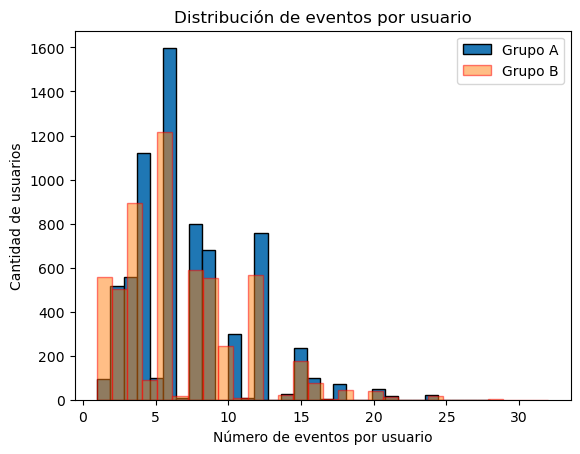

In [22]:
# Análisis de la distribución de eventos por usuario por grupo A y B.

eventos_usuariosA = muestraA.groupby('user_id').size()
eventos_usuariosB = muestraB.groupby('user_id').size()

plt.hist(eventos_usuariosA, bins=30, edgecolor='black', label = 'Grupo A')
plt.hist(eventos_usuariosB, bins=30, edgecolor='red', alpha = 0.5, label = 'Grupo B')
plt.xlabel('Número de eventos por usuario')
plt.ylabel('Cantidad de usuarios')
plt.title('Distribución de eventos por usuario')
plt.legend()
plt.show()

In [23]:
# Se calculan los coeficientes de variación y desviación estándar de los eventos por usuarios en ambos grupos.

stdA = eventos_usuariosA.std()
meanA = eventos_usuariosA.mean()
cvA = stdA / meanA # Coeficiente de variación

print(f"Desviación estándar en muestra A: {stdA:.2f}")
print(f"Media de la muestra A: {meanA:.2f}")
print(f"Coeficiente de variación en muestra A: {cvA:.2f}")

stdB = eventos_usuariosB.std()
meanB = eventos_usuariosB.mean()
cvB = stdB / meanB # Coeficiente de variación
print()
print(f"Desviación estándar en muestra B: {stdB:.2f}")
print(f"Media de la muestra B: {meanB:.2f}")
print(f"Coeficiente de variación en muestra B: {cvB:.2f}")

Desviación estándar en muestra A: 4.09
Media de la muestra A: 7.24
Coeficiente de variación en muestra A: 0.56

Desviación estándar en muestra B: 4.12
Media de la muestra B: 7.08
Coeficiente de variación en muestra B: 0.58


El número de eventos por usuario no está distribuido equitativamente entre las muestras, ya que para estarlo el coeficiente de variación tiene que ser cercano a 0 y en este caso, en ambas están arriba de 0.55, lo que indica que existe bastante desigualdad.

- ¿Cómo se distribuye el número de eventos entre los días?

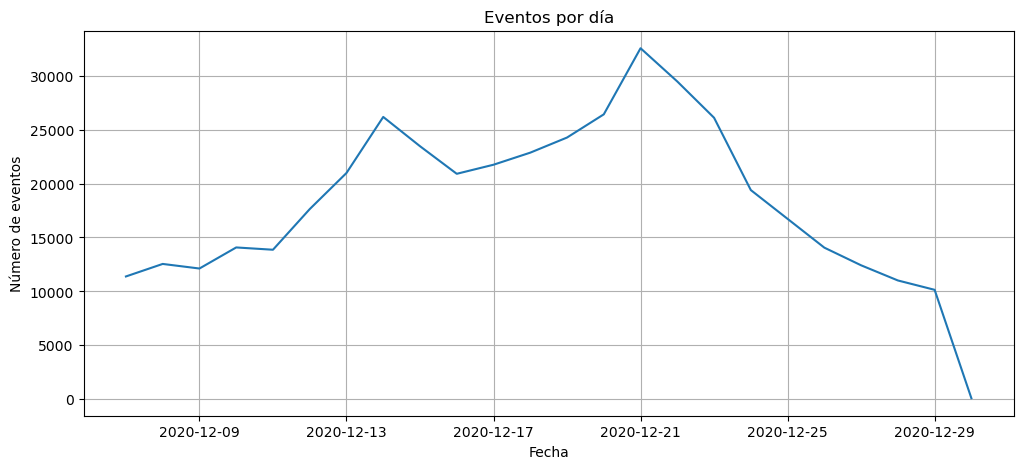

In [24]:
# Se gráfican los eventos por día.

eventos_por_dia = eventos_grupos.groupby(eventos_grupos['event_dt'].dt.date).size()

eventos_por_dia.plot(kind='line', figsize=(12, 5))
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.title('Eventos por día')
plt.grid(True)
plt.show()

In [25]:
# Se calculan los coeficientes de variación y desviación estándar de los eventos de los usuarios por día.

stdD = eventos_por_dia.std()
meanD = eventos_por_dia.mean()
cvD = stdD / meanD # Coeficiente de variación

print(f"Desviación estándar por día: {stdD:.2f}")
print(f"Media de la muestra por día: {meanD:.2f}")
print(f"Coeficiente de variación por día: {cvD:.2f}")

Desviación estándar por día: 7651.97
Media de la muestra por día: 18424.39
Coeficiente de variación por día: 0.42


De igual manera es muy desigual la distribución de los eventos por día de los usuarios, ya que el coeficiente de variación es de 0.42.

- ¿Hay alguna peculiaridad en los datos que hay que tener en cuenta antes de iniciar la prueba A/B?

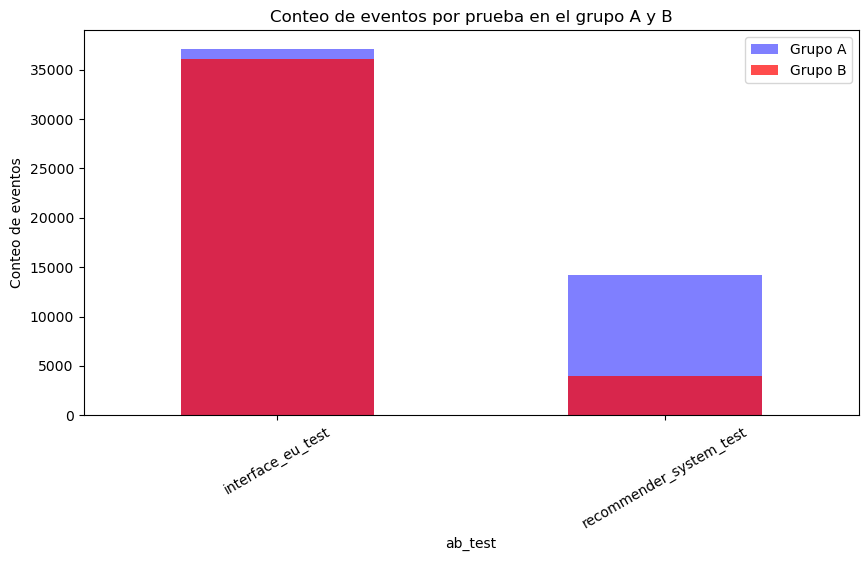

In [26]:
# Se gráfican los eventos por prueba en los grupos A y B.

muestraA['ab_test'].value_counts().plot(kind='bar', figsize=(10, 5), color='blue', alpha=0.5, label = 'Grupo A')
muestraB['ab_test'].value_counts().plot(kind='bar', figsize=(10, 5), color='red', alpha=0.7, label = 'Grupo B')
plt.ylabel('Conteo de eventos')
plt.title('Conteo de eventos por prueba en el grupo A y B')
plt.legend()
plt.xticks(rotation = 30)
plt.show()

In [27]:
promos

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


En el conteo de los valores en la columna ab_test para la interface_eu_test están muy similares las muestras pero para la cuestión de la prueba recomender_system_test es muy desigual, ya que el grupo A tiene 14215 eventos mientras que el grupo B solo cuenta con 3979 eventos, es decir solo el 28 % de datos en comparación con la muestra del otro grupo.<br>
De igual manera dos promociones fueron lanzadas durante el periodo de prueba (Christmas&New Year Promo y CIS New Year Gift Lottery) pero según el análisis que vimos en la gráfica de eventos por día no se ve que haya afectación por estas promociónes ya que en estas fechas se ve en bajada la tendencia de los eventos por día.

### Evaluar los resultados de la prueba A/B:

In [28]:
# Creación de un embudo de eventos para el grupo de control (grupo A).

total_eventos_control = muestraA['event_name'].count()
print(f"Total de eventos en grupo de control: {total_eventos_control}")
control = muestraA['event_name'].value_counts().reset_index()
control.columns = ['evento', 'total']

interface_control = muestraA[muestraA['ab_test'] == 'interface_eu_test']['event_name'].value_counts().reset_index()
interface_control.columns = ['evento', 'interface']

recommender_control = muestraA[muestraA['ab_test'] == 'recommender_system_test']['event_name'].value_counts().reset_index()
recommender_control.columns = ['evento', 'recommender']

control = pd.merge(control, interface_control, on = 'evento', how = 'left')
control = pd.merge(control, recommender_control, on = 'evento', how = 'left')
control['porcentaje'] = round((control['recommender'] / control['interface']) * 100, 2)

print(control)

Total de eventos en grupo de control: 51350
         evento  total  interface  recommender  porcentaje
0         login  22073      15771         6302       39.96
1  product_page  14635      10544         4091       38.80
2      purchase   7520       5631         1889       33.55
3  product_cart   7122       5189         1933       37.25


In [29]:
# Calcular el % de conversion entre etapas
control['conversion_total'] = round(control['total'] / control['total'].shift(1) * 100, 2)
control['conversion_interface'] = round(control['interface'] / control['interface'].shift(1) * 100, 2)
control['conversion_recommender'] = round(control['recommender'] / control['recommender'].shift(1) * 100, 2)

# Rellenar el primer valor (NaN en la primera fila) con 100%
control[['conversion_total', 'conversion_interface', 'conversion_recommender']] = control[[
    'conversion_total', 'conversion_interface', 'conversion_recommender']].fillna(100)

control['dif_porcentaje'] = control['conversion_recommender'] - control['conversion_interface']

print(control)

         evento  total  interface  recommender  porcentaje  conversion_total  \
0         login  22073      15771         6302       39.96            100.00   
1  product_page  14635      10544         4091       38.80             66.30   
2      purchase   7520       5631         1889       33.55             51.38   
3  product_cart   7122       5189         1933       37.25             94.71   

   conversion_interface  conversion_recommender  dif_porcentaje  
0                100.00                  100.00            0.00  
1                 66.86                   64.92           -1.94  
2                 53.40                   46.17           -7.23  
3                 92.15                  102.33           10.18  


En el grupo de control la interface normal genero mejor conversión que la nueva interface con recomendaciones para los usuarios, ya que la conversión fue mayor en las etapas del embudo:<br>
- En la etapa de product_page por 1.94 %. <br>
- En purchase por 7.23 %.<br>
<br>
Solo en la etapa de product_cart el grupo de recomendación fue mejor por 10.18%.

In [30]:
fig2 = px.funnel(control,
                x = ['conversion_interface', 'conversion_recommender'],
                y = 'evento',
                title = 'Embudo de eventos en grupo de control',
                labels = {'index': 'evento', 'value': 'Número de eventos'}
)

colors2 = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
colors21 = ['red', 'green', 'white', 'blue']

fig2.data[0].marker.color = color = colors2[:len(fig2.data[0].y)]
fig2.data[0].marker.line.width = 2
fig2.data[0].marker.line.color = 'lightgray'

fig2.data[1].marker.color = color = colors21[:len(fig2.data[0].y)]
fig2.data[1].marker.line.width = 2
fig2.data[1].marker.line.color = 'lightgray'

fig2.update_layout(
    paper_bgcolor = 'black',
    plot_bgcolor = 'black',
    font_color = 'white'
)                
fig2.show()

In [31]:
# Creación de un embudo de eventos para el grupo de prueba (grupo B).

total_eventos_prueba = muestraB['event_name'].count()
print(f"Total de eventos en grupo de prueba: {total_eventos_prueba}")
prueba = muestraB['event_name'].value_counts().reset_index()
prueba.columns = ['evento', 'total']

interface_prueba = muestraB[muestraB['ab_test'] == 'interface_eu_test']['event_name'].value_counts().reset_index()
interface_prueba.columns = ['evento', 'interface']

recommender_prueba = muestraB[muestraB['ab_test'] == 'recommender_system_test']['event_name'].value_counts().reset_index()
recommender_prueba.columns = ['evento', 'recommender']

prueba = pd.merge(prueba, interface_prueba, on = 'evento', how = 'left')
prueba = pd.merge(prueba, recommender_prueba, on = 'evento', how = 'left')
prueba['porcentaje'] = round((prueba['recommender'] / prueba['interface']) * 100, 2)

print(prueba)

Total de eventos en grupo de prueba: 40058
         evento  total  interface  recommender  porcentaje
0         login  17424      15493         1931       12.46
1  product_page  11150      10127         1023       10.10
2  product_cart   5790       5266          524        9.95
3      purchase   5694       5193          501        9.65


In [32]:
# Calcular el % de conversión entre etapas
prueba['conversion_total'] = round(prueba['total'] / prueba['total'].shift(1) * 100, 2)
prueba['conversion_interface'] = round(prueba['interface'] / prueba['interface'].shift(1) * 100, 2)
prueba['conversion_recommender'] = round(prueba['recommender'] / prueba['recommender'].shift(1) * 100, 2)

# Rellenar el primer valor (NaN en la primera fila) con 100%
prueba[['conversion_total', 'conversion_interface', 'conversion_recommender']] = prueba[[
    'conversion_total', 'conversion_interface', 'conversion_recommender']].fillna(100)

prueba['dif_porcentaje'] = prueba['conversion_recommender'] - prueba['conversion_interface']

print(prueba)

         evento  total  interface  recommender  porcentaje  conversion_total  \
0         login  17424      15493         1931       12.46            100.00   
1  product_page  11150      10127         1023       10.10             63.99   
2  product_cart   5790       5266          524        9.95             51.93   
3      purchase   5694       5193          501        9.65             98.34   

   conversion_interface  conversion_recommender  dif_porcentaje  
0                100.00                  100.00            0.00  
1                 65.37                   52.98          -12.39  
2                 52.00                   51.22           -0.78  
3                 98.61                   95.61           -3.00  


En el grupo de prueba la interface normal genero mejor conversión que la nueva interface con recomendaciones para los usuarios, ya que la conversión fue mayor en todas las etapas del embudo:<br>
- En la etapa de product_page por 12.39 %. <br>
- En product_cart por 0.78 %.<br>
- En purchase por 3.00 %.

In [33]:
fig3 = px.funnel(prueba,
                x = ['conversion_interface', 'conversion_recommender'],
                y = 'evento',
                title = 'Embudo de eventos en grupo de prueba',
                labels = {'index': 'evento', 'value': 'Número de eventos'}
)

colors2 = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
colors21 = ['red', 'green', 'white', 'blue']

fig3.data[0].marker.color = color = colors2[:len(fig3.data[0].y)]
fig3.data[0].marker.line.width = 2
fig3.data[0].marker.line.color = 'lightgray'

fig3.data[1].marker.color = color = colors21[:len(fig3.data[0].y)]
fig3.data[1].marker.line.width = 2
fig3.data[1].marker.line.color = 'lightgray'

fig3.update_layout(
    paper_bgcolor = 'black',
    plot_bgcolor = 'black',
    font_color = 'white'
)                
fig3.show()

In [34]:
# Usuarios que realizaron compras con la interfaz de recomendación.
exitos = [control['recommender'][3], prueba['recommender'][3]]

# Total de usuarios que se logearon en la interfaz de recomendación para cada grupo.
total = [control['recommender'].sum(), prueba['recommender'].sum()]

# Prueba Z para verificar proporciones.
z_stat, p_value = proportions_ztest(exitos, total)
print(f"Estadistico Z: {z_stat:.4f}")
print(f"Valor P: {p_value:.4f}")

if p_value < 0.05:
    print("Se rechaza la hipótesis nula: hay una diferencia significativa entre los grupos.")
else:
    print("No se rechaza la hipótesis nula: no hay una diferencia significativa entre los grupos.")

Estadistico Z: 1.6497
Valor P: 0.0990
No se rechaza la hipótesis nula: no hay una diferencia significativa entre los grupos.


Se realizó una prueba Z para verificar si había una diferencia significativa entre ambas muestras de recomendación del grupo A y del grupo B, pero no se pudo rechazar ya aunque los datos en la muestra del grupo b son menores, no se encontro una diferencia significativa entre los grupos.

En base a los resultados obtenidos en este análisis no se recomienda continuar con el sistema de recommender_system_test, ya que como estaban anteriormente los embudos tenían mejor conversión entre las etapas.